In [1]:
import os, sys
current_dir = os.path.dirname(os.path.abspath(r"C:\ET_study\Image Processing\module.py"))
sys.path.append(current_dir)
from module import *

In [2]:
incept_v3_pretrained = InceptionV3(
    include_top=True,
    weights="imagenet",
)
incept_v3_pretrained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [3]:
img_path = '../data/airplane_1.jpg'

img = load_img(img_path, target_size=(299, 299))

x = img_to_array(img)
type(x)

numpy.ndarray

In [4]:
x.shape

(299, 299, 3)

In [5]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 299, 299, 3)

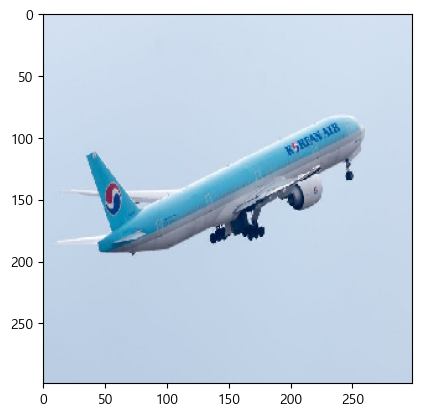

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


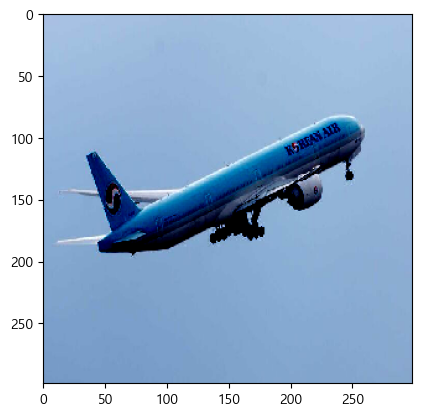

In [6]:
x = preprocess_input(x)

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()

In [7]:
output = incept_v3_pretrained.predict(x)
output

1/1 [==============================] - 2s 2s/step


array([[5.44918876e-05, 6.60779551e-05, 1.03979408e-04, 8.17082910e-05,
        9.20080856e-05, 9.43777413e-05, 2.32338680e-05, 5.58800712e-05,
        5.27812590e-05, 5.31139667e-05, 9.36093566e-05, 4.25870785e-05,
        6.59911093e-05, 7.56743320e-05, 1.70129948e-04, 4.50055923e-05,
        5.88917464e-05, 5.75882805e-05, 3.28017086e-05, 1.04119419e-04,
        1.03474609e-04, 1.35659458e-04, 1.22931422e-04, 2.39880028e-04,
        1.22230471e-04, 9.98945980e-05, 5.36541265e-05, 5.03391166e-05,
        9.58185483e-05, 4.28283565e-05, 6.69514193e-05, 7.44679419e-05,
        6.20217033e-05, 1.00282326e-04, 9.23011903e-05, 9.95550727e-05,
        7.72232670e-05, 9.26544017e-05, 4.18253876e-05, 2.44952880e-05,
        6.35184333e-05, 2.47794116e-04, 9.97194657e-05, 9.15525015e-05,
        9.80198456e-05, 7.17233852e-05, 9.32807889e-05, 3.77563701e-05,
        8.48024938e-05, 5.19702953e-05, 2.12828691e-05, 4.84954471e-05,
        1.78270173e-04, 8.70097210e-05, 5.87210852e-05, 1.055221

In [8]:
decode_predictions(output, top=5)

[[('n02690373', 'airliner', 0.8788781),
  ('n04592741', 'wing', 0.038727913),
  ('n04552348', 'warplane', 0.00081294833),
  ('n02692877', 'airship', 0.0007935009),
  ('n02483362', 'gibbon', 0.0006982415)]]

In [9]:
img_cv = cv2.imread('../data/airplane_1.jpg')
text = 'Airliner, 88%'
red = (0, 0, 255)

cv2.putText(img_cv, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, red, 2, cv2.LINE_AA)

cv2.imshow('img', img_cv)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
folder_path = "../data/"  # 이미지 파일들이 있는 폴더의 경로
image_list = []  # 이미지들을 저장할 리스트

# 이미지 파일들을 필터링하여 리스트로 가져옵니다.
image_files = glob.glob(folder_path + "/*.jpg") + glob.glob(folder_path + "/*.jpeg") + glob.glob(folder_path + "/*.png") + glob.glob(folder_path + "/*.bmp")

# 각 이미지 파일에 대해 반복합니다.
for file_path in image_files:
    # 이미지를 불러와서 리스트에 추가합니다.
    image = cv2.imread(file_path)
    image_list.append(image)

for image, file_path in zip(image_list, image_files):
    img = load_img(file_path, target_size=(299, 299))

    x = img_to_array(img)

    x = np.expand_dims(x, axis=0)

    x = preprocess_input(x)

    output = incept_v3_pretrained.predict(x)

    result = decode_predictions(output, top=5)

    img_cv = cv2.imread(file_path)

    max_val = float('-inf')  # 초기값으로 음의 무한대를 설정합니다.
    for i in result:
        for j in i:
            if j[2] > max_val:
                max_val = j[2]
                name = j[1]

    text = f'{name} : {int(max_val * 100)} %'

    red = (0, 0, 255)
    black = (0, 0, 0)

    cv2.putText(img_cv, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, black, 5, cv2.LINE_AA)
    cv2.putText(img_cv, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, red, 2, cv2.LINE_AA)

    cv2.imshow('Image', img_cv)

    if cv2.waitKey(0) == ord('q'):
        break

cv2.destroyAllWindows()

1/1 [==============================] - 0s 124ms/step


In [54]:
def process_image(image_path):
    image = cv2.imread(image_path)

    x = img_to_array(image)

    x = np.expand_dims(x, axis=0)

    x = preprocess_input(x)

    output = incept_v3_pretrained.predict(x)

    result = decode_predictions(output, top=5)

    img_cv = cv2.imread(image_path)

    max_val = float('-inf')  # 초기값으로 음의 무한대를 설정합니다.
    for i in result:
        for j in i:
            if j[2] > max_val:
                max_val = j[2]
                name = j[1]

    text = f'{name} : {round(max_val * 100, 2)} %'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 1

    red = (0, 0, 255)
    black = (0, 0, 0)

    cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Image', 600, 600)

    # 텍스트 크기 조정을 위한 비율 계산
    text_height = image.shape[0] // 20  # 텍스트 높이는 이미지 높이의 1/20로 설정합니다.
    # font_scale = text_height / 15  # 원하는 폰트 크기에 대한 비율을 계산합니다.
    font_thickness = 2

    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_x = 10  # 왼쪽으로 이동할 값 설정
    text_y = text_size[1] + 10  # 위쪽으로 이동할 값 설정

    cv2.putText(image, text, (text_x, text_y), font, font_scale, black, 5, cv2.LINE_AA)
    cv2.putText(image, text, (text_x, text_y), font, font_scale, red, font_thickness, cv2.LINE_AA)

    cv2.imshow('Image', image)
    key = cv2.waitKey(0)
    cv2.destroyAllWindows()

    if key == ord('q'):
        sys.exit()

In [55]:
anminal_folder = r'C:\Users\korea\Downloads\animals'

for root, dirs, folders in os.walk(anminal_folder):
    for folder_name in dirs:
        folder_path = os.path.join(root, folder_name)
        for root_in, dirs_in, files_in in os.walk(folder_path):
            for file_in in files_in:
                image_path = os.path.join(root_in, file_in)
                if image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    process_image(image_path)

1/1 [==============================] - 1s 626ms/step


SystemExit: 